Estimated filter order N = 31
Kaiser beta parameter = 3.3953


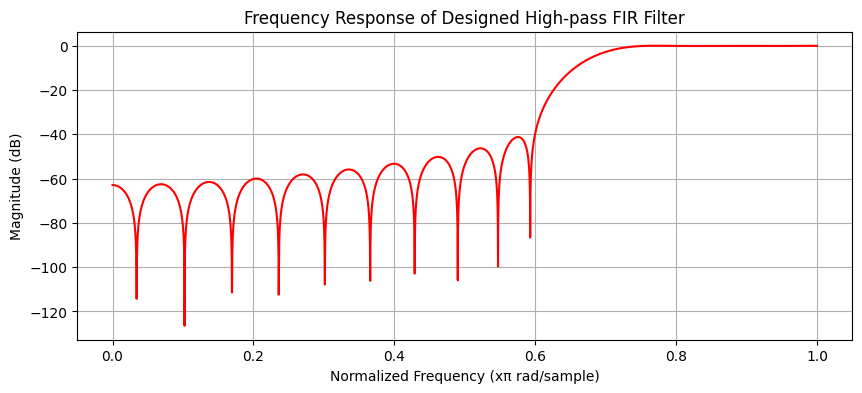

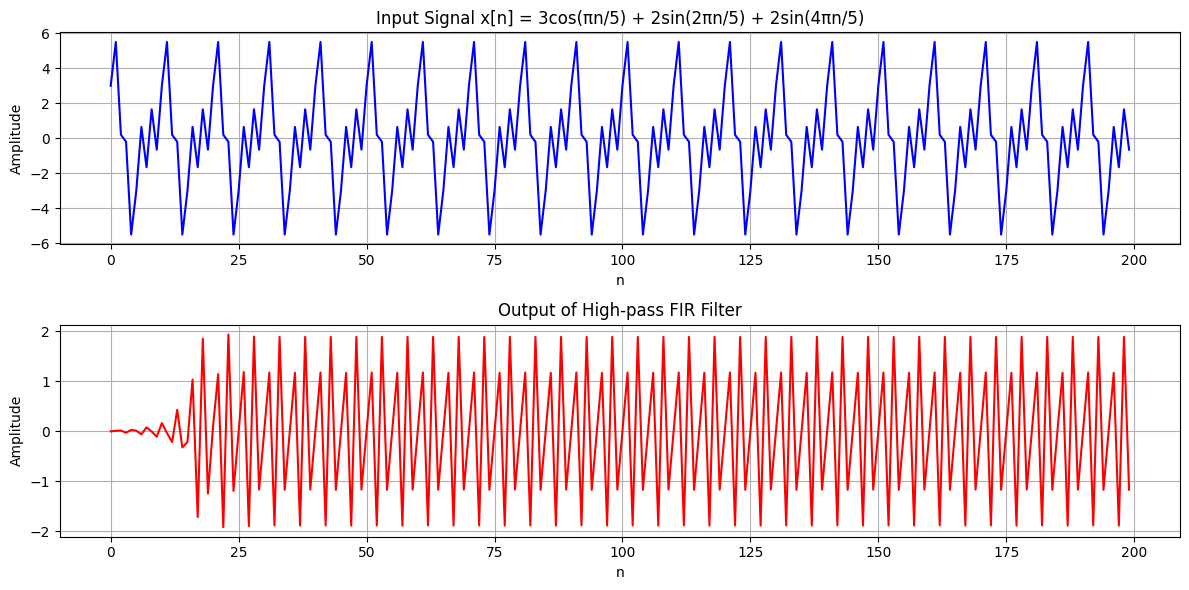

Explanation:
The input signal x[n] consists of three sinusoidal components with frequencies ω1 = 1/5, ω2 = 2/5, and ω3 = 4/5.
The designed high-pass filter aims to attenuate lower frequencies, so after filtering, lower-frequency components (like ω1 = 1/5) should be reduced,
while higher-frequency components (such as ω3 = 4/5) should remain largely intact. This is visible in the output signal plot.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter
# Design parameters for the high-pass FIR filter
omega_s = 0.6 * np.pi  
omega_p = 0.75 * np.pi  
A_s = 40                
R_p = 1                  

f_s = omega_s / np.pi   
f_p = omega_p / np.pi    
bw = f_p - f_s           

if A_s > 50:
    beta = 0.1102 * (A_s - 8.7)
elif A_s > 21:
    beta = 0.5842 * (A_s - 21)**0.4 + 0.07886 * (A_s - 21)
else:
    beta = 0

# Estimate filter order N
N = 33
#if N % 2 == 0:
#    N += 1  # Ensure N is odd

print(f"Estimated filter order N = {N}")
print(f"Kaiser beta parameter = {beta:.4f}")

cutoff = (f_s + f_p) / 2  
h = firwin(N, cutoff=cutoff, window=('kaiser', beta), pass_zero=False)

# Plot the frequency response of the filter
w, H = freqz(h, worN=8000)
plt.figure(figsize=(10, 4))
plt.plot(w / np.pi, 20 * np.log10(np.maximum(abs(H), 1e-10)), 'r')
plt.title('Frequency Response of Designed High-pass FIR Filter')
plt.xlabel('Normalized Frequency (xπ rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

# Generate the input signal x[n] = 3cos(\pi n / 5) + 2sin(2\pi n / 5) + 2sin(4\pi n / 5)
n = np.arange(200)
x_n = 3 * np.cos((np.pi * n) / 5) + 2 * np.sin((2 * np.pi * n) / 5) + 2 * np.sin((4 * np.pi * n) / 5)

# Apply the designed high-pass FIR filter to x[n]
y_n = lfilter(h, 1.0, x_n)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(n, x_n, label='Input Signal x[n]', color='b')
plt.title('Input Signal x[n] = 3cos(\u03c0n/5) + 2sin(2\u03c0n/5) + 2sin(4\u03c0n/5)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n, y_n, label='Filtered Signal y[n]', color='r')
plt.title('Output of High-pass FIR Filter')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Explanation of filtering effect:
print("Explanation:")
print("The input signal x[n] consists of three sinusoidal components with frequencies ω1 = 1/5, ω2 = 2/5, and ω3 = 4/5.")
print("The designed high-pass filter aims to attenuate lower frequencies, so after filtering, lower-frequency components (like ω1 = 1/5) should be reduced,")
print("while higher-frequency components (such as ω3 = 4/5) should remain largely intact. This is visible in the output signal plot.")

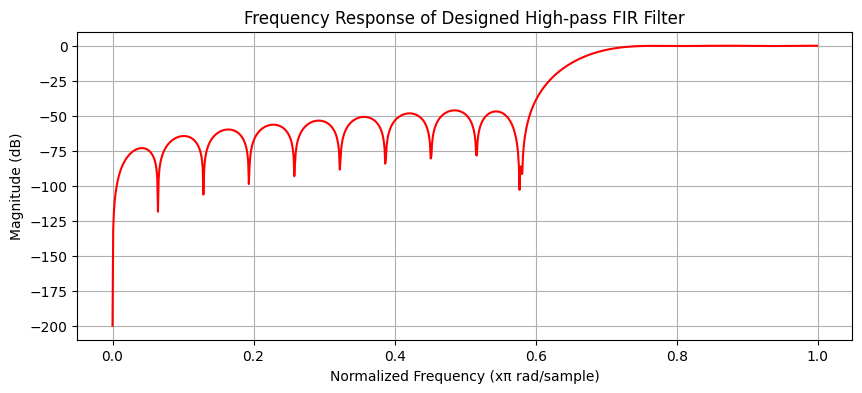

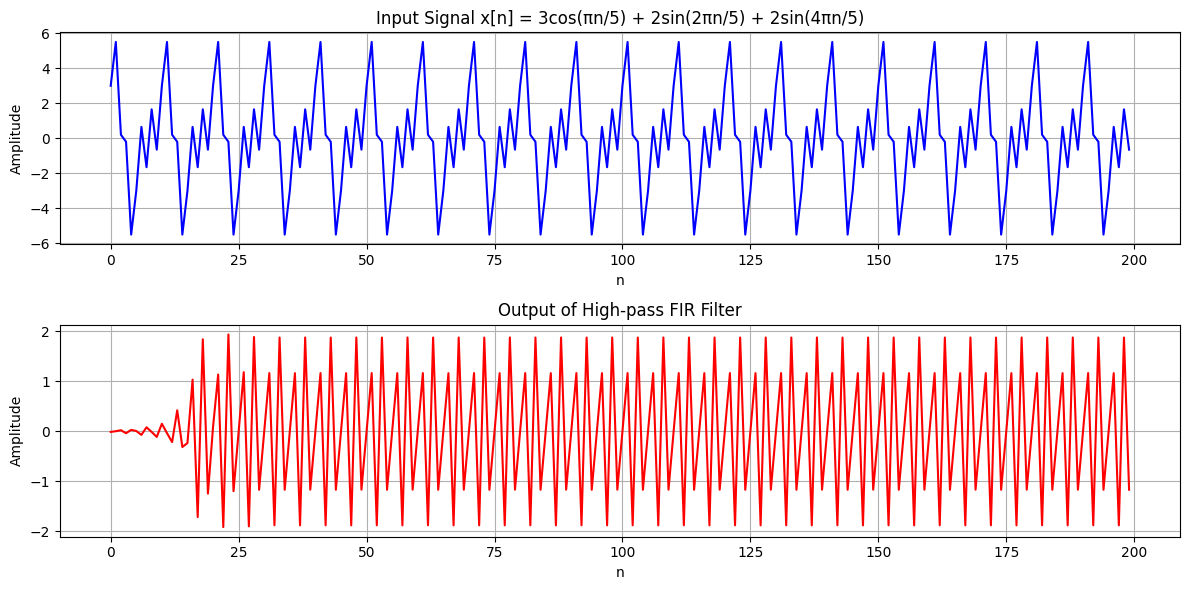

Explanation:
The input signal x[n] consists of three sinusoidal components with frequencies ω1 = 1/5, ω2 = 2/5, and ω3 = 4/5.
The designed high-pass filter aims to attenuate lower frequencies, so after filtering, lower-frequency components (like ω1 = 1/5) should be reduced,
while higher-frequency components (such as ω3 = 4/5) should remain largely intact. This is visible in the output signal plot.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter

# High-Pass FIR Filter Design Parameters
M = 31                # Filter order (length of filter)
wp = 0.75 * np.pi     # Passband edge frequency
ws = 0.6 * np.pi      # Stopband edge frequency
Rp = 1                # Passband ripple in dB
As_target = 40        # Desired stopband attenuation in dB

# Updated transition band values
T1 = 0.2              # Amplitude value in the first transition sample
T2 = 0.8              # Amplitude value in the second transition sample

alpha = (M - 1) / 2    # Symmetry parameter for frequency sampling
l = np.arange(M)       # Sample indices
wl = (2 * np.pi / M) * l  # Frequency samples in rad/sample

kp = int(np.floor((M * wp) / (2 * np.pi)))  # Passband edge index
ks = int(np.floor((M * ws) / (2 * np.pi)))  # Stopband start index

# Construct the sampled amplitude response H_r(k)
Hrk = np.concatenate([
    np.zeros(ks+1),     # Stopband samples
    [T1, T2],           # Transition band samples
    np.ones(8),         # Passband samples
    [T2, T1],           # Mirrored transition band samples
    np.zeros(ks)        # Stopband samples (mirrored for symmetry)
])

# Validate the length of Hrk
if len(Hrk) != M:
    raise ValueError(f'Hrk must have length {M}')

# Construct the filter's frequency response
k1 = np.arange(0, (M-1)//2 + 1)
k2 = np.arange((M-1)//2 + 1, M)
phase_shift = np.concatenate([
    -alpha * (2 * np.pi) / M * k1, 
    alpha * (2 * np.pi) / M * (M - k2)
])
H = Hrk * np.exp(1j * phase_shift)   # Apply phase shifts to preserve symmetry
h = np.real(np.fft.ifft(H, M))       # Compute impulse response (h[n])

# Compute the filter's frequency response using freqz
w, H_freqz = freqz(h, worN=1024)      # 1024 points for smoother plot
db_response = 20 * np.log10(np.abs(H_freqz) + 1e-10)  # Avoid log(0)
Hr_magnitude = np.abs(H_freqz)

# Plot the frequency response
plt.figure(figsize=(10, 4))
plt.plot(w / np.pi, db_response, 'r')
plt.title('Frequency Response of Designed High-pass FIR Filter')
plt.xlabel('Normalized Frequency (xπ rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

# Generate the input signal x[n] = 3cos(πn/5) + 2sin(2πn/5) + 2sin(4πn/5)
n = np.arange(200)
x_n = 3 * np.cos(np.pi * n / 5) + 2 * np.sin(2 * np.pi * n / 5) + 2 * np.sin(4 * np.pi * n / 5)

# Apply the designed high-pass FIR filter to x[n]
y_n = lfilter(h, 1.0, x_n)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(n, x_n, label='Input Signal x[n]', color='b')
plt.title('Input Signal x[n] = 3cos(πn/5) + 2sin(2πn/5) + 2sin(4πn/5)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n, y_n, label='Filtered Signal y[n]', color='r')
plt.title('Output of High-pass FIR Filter')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Explanation of filtering effect:
print("Explanation:")
print("The input signal x[n] consists of three sinusoidal components with frequencies ω1 = 1/5, ω2 = 2/5, and ω3 = 4/5.")
print("The designed high-pass filter aims to attenuate lower frequencies, so after filtering, lower-frequency components (like ω1 = 1/5) should be reduced,")
print("while higher-frequency components (such as ω3 = 4/5) should remain largely intact. This is visible in the output signal plot.")

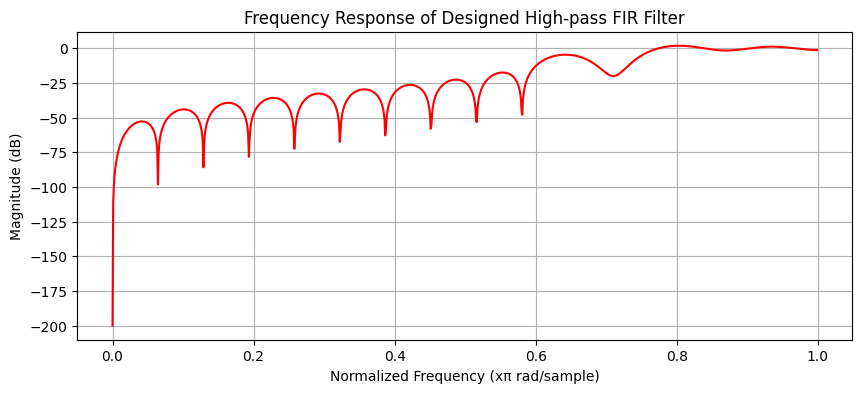

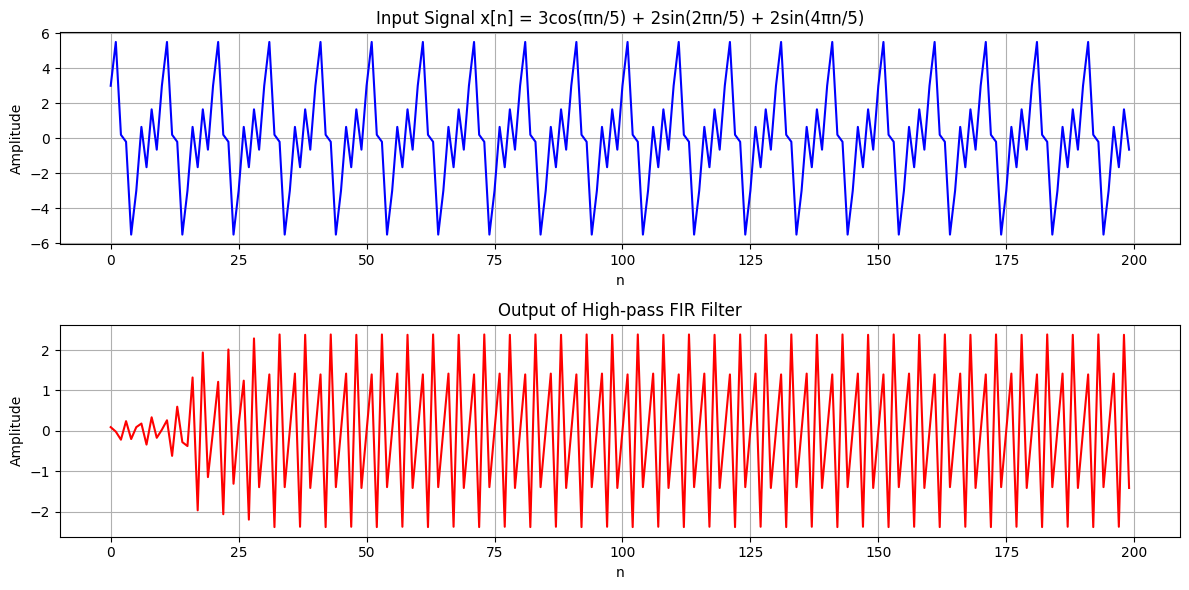

Explanation:
The input signal x[n] consists of three sinusoidal components with frequencies ω1 = 1/5, ω2 = 2/5, and ω3 = 4/5.
The designed high-pass filter aims to attenuate lower frequencies, so after filtering, lower-frequency components (like ω1 = 1/5) should be reduced,
while higher-frequency components (such as ω3 = 4/5) should remain largely intact. This is visible in the output signal plot.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter

# High-Pass FIR Filter Design Parameters
M = 31                # Filter order (length of filter)
wp = 0.75 * np.pi     # Passband edge frequency
ws = 0.6 * np.pi      # Stopband edge frequency
Rp = 1                # Passband ripple in dB
As_target = 40        # Desired stopband attenuation in dB

# Updated transition band values
T1 = 0.588              # Amplitude value in the first transition sample
T2 = 0.1              # Amplitude value in the second transition sample

alpha = (M - 1) / 2    # Symmetry parameter for frequency sampling
l = np.arange(M)       # Sample indices
wl = (2 * np.pi / M) * l  # Frequency samples in rad/sample

kp = int(np.floor((M * wp) / (2 * np.pi)))  # Passband edge index
ks = int(np.floor((M * ws) / (2 * np.pi)))  # Stopband start index

# Construct the sampled amplitude response H_r(k)
Hrk = np.concatenate([
    np.zeros(ks+1),     # Stopband samples
    [T1, T2],           # Transition band samples
    np.ones(8),         # Passband samples
    [T2, T1],           # Mirrored transition band samples
    np.zeros(ks)        # Stopband samples (mirrored for symmetry)
])

# Validate the length of Hrk
if len(Hrk) != M:
    raise ValueError(f'Hrk must have length {M}')

# Construct the filter's frequency response
k1 = np.arange(0, (M-1)//2 + 1)
k2 = np.arange((M-1)//2 + 1, M)
phase_shift = np.concatenate([
    -alpha * (2 * np.pi) / M * k1, 
    alpha * (2 * np.pi) / M * (M - k2)
])
H = Hrk * np.exp(1j * phase_shift)   # Apply phase shifts to preserve symmetry
h = np.real(np.fft.ifft(H, M))       # Compute impulse response (h[n])

# Compute the filter's frequency response using freqz
w, H_freqz = freqz(h, worN=1024)      # 1024 points for smoother plot
db_response = 20 * np.log10(np.abs(H_freqz) + 1e-10)  # Avoid log(0)
Hr_magnitude = np.abs(H_freqz)

# Plot the frequency response
plt.figure(figsize=(10, 4))
plt.plot(w / np.pi, db_response, 'r')
plt.title('Frequency Response of Designed High-pass FIR Filter')
plt.xlabel('Normalized Frequency (xπ rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

# Generate the input signal x[n] = 3cos(πn/5) + 2sin(2πn/5) + 2sin(4πn/5)
n = np.arange(200)
x_n = 3 * np.cos(np.pi * n / 5) + 2 * np.sin(2 * np.pi * n / 5) + 2 * np.sin(4 * np.pi * n / 5)

# Apply the designed high-pass FIR filter to x[n]
y_n = lfilter(h, 1.0, x_n)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(n, x_n, label='Input Signal x[n]', color='b')
plt.title('Input Signal x[n] = 3cos(πn/5) + 2sin(2πn/5) + 2sin(4πn/5)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n, y_n, label='Filtered Signal y[n]', color='r')
plt.title('Output of High-pass FIR Filter')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


# Explanation of filtering effect:
print("Explanation:")
print("The input signal x[n] consists of three sinusoidal components with frequencies ω1 = 1/5, ω2 = 2/5, and ω3 = 4/5.")
print("The designed high-pass filter aims to attenuate lower frequencies, so after filtering, lower-frequency components (like ω1 = 1/5) should be reduced,")
print("while higher-frequency components (such as ω3 = 4/5) should remain largely intact. This is visible in the output signal plot.")